## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [12]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.3, 0.5]
redice_lr_patient = [5, 8]

In [13]:
import itertools
from keras.layers import BatchNormalization
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """

    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.30, reduce_patient: 5
Model: "functional_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_117 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_118 (Bat (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_____________________________________________________________

49/49 [==============================] - 3s 66ms/step - loss: 1.2611 - accuracy: 0.5611 - val_loss: 1.4834 - val_accuracy: 0.4746
Epoch 14/25
49/49 [==============================] - 3s 63ms/step - loss: 1.2415 - accuracy: 0.5672 - val_loss: 1.4818 - val_accuracy: 0.4756
Epoch 15/25
49/49 [==============================] - 3s 60ms/step - loss: 1.2201 - accuracy: 0.5771 - val_loss: 1.4825 - val_accuracy: 0.4804
Epoch 16/25
49/49 [==============================] - 3s 69ms/step - loss: 1.1995 - accuracy: 0.5842 - val_loss: 1.4755 - val_accuracy: 0.4749
Epoch 17/25
49/49 [==============================] - 3s 68ms/step - loss: 1.1799 - accuracy: 0.5915 - val_loss: 1.4810 - val_accuracy: 0.4816
Epoch 18/25
49/49 [==============================] - 3s 63ms/step - loss: 1.1607 - accuracy: 0.5979 - val_loss: 1.4678 - val_accuracy: 0.4815
Epoch 19/25
49/49 [==============================] - 3s 62ms/step - loss: 1.1413 - accuracy: 0.6062 - val_loss: 1.4663 - val_accuracy: 0.4844
Epoch 20/25
49/49 

Epoch 1/25
49/49 [==============================] - 3s 62ms/step - loss: 2.2141 - accuracy: 0.2660 - val_loss: 2.1516 - val_accuracy: 0.2017
Epoch 2/25
49/49 [==============================] - 3s 58ms/step - loss: 1.7671 - accuracy: 0.3827 - val_loss: 2.0108 - val_accuracy: 0.2815
Epoch 3/25
49/49 [==============================] - 3s 57ms/step - loss: 1.6352 - accuracy: 0.4243 - val_loss: 1.8676 - val_accuracy: 0.3432
Epoch 4/25
49/49 [==============================] - 3s 59ms/step - loss: 1.5611 - accuracy: 0.4497 - val_loss: 1.7384 - val_accuracy: 0.3940
Epoch 5/25
49/49 [==============================] - 3s 59ms/step - loss: 1.5060 - accuracy: 0.4703 - val_loss: 1.6586 - val_accuracy: 0.4157
Epoch 6/25
49/49 [==============================] - 3s 56ms/step - loss: 1.4616 - accuracy: 0.4863 - val_loss: 1.5949 - val_accuracy: 0.4351
Epoch 7/25
49/49 [==============================] - 3s 60ms/step - loss: 1.4215 - accuracy: 0.5018 - val_loss: 1.5557 - val_accuracy: 0.4530
Epoch 8/25
49

49/49 [==============================] - 3s 54ms/step - loss: 0.5442 - accuracy: 0.8351 - val_loss: 1.4115 - val_accuracy: 0.5343
Epoch 22/25
49/49 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.8392
Epoch 00022: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
49/49 [==============================] - 3s 57ms/step - loss: 0.5349 - accuracy: 0.8392 - val_loss: 1.4272 - val_accuracy: 0.5376
Epoch 23/25
49/49 [==============================] - 3s 66ms/step - loss: 0.5156 - accuracy: 0.8481 - val_loss: 1.4041 - val_accuracy: 0.5390
Epoch 24/25
49/49 [==============================] - 3s 58ms/step - loss: 0.5117 - accuracy: 0.8495 - val_loss: 1.4088 - val_accuracy: 0.5393
Epoch 25/25
49/49 [==============================] - 3s 53ms/step - loss: 0.5071 - accuracy: 0.8530 - val_loss: 1.4186 - val_accuracy: 0.5381
Numbers of exp: 5, reduce_factor: 0.30, reduce_patient: 8
Model: "functional_89"
__________________________________________________________

Epoch 7/25
49/49 [==============================] - 3s 59ms/step - loss: 1.3831 - accuracy: 0.5187 - val_loss: 1.5392 - val_accuracy: 0.4595
Epoch 8/25
49/49 [==============================] - 3s 54ms/step - loss: 1.3581 - accuracy: 0.5275 - val_loss: 1.5162 - val_accuracy: 0.4641
Epoch 9/25
49/49 [==============================] - 3s 63ms/step - loss: 1.3355 - accuracy: 0.5336 - val_loss: 1.5014 - val_accuracy: 0.4726
Epoch 10/25
49/49 [==============================] - 3s 57ms/step - loss: 1.3138 - accuracy: 0.5428 - val_loss: 1.5044 - val_accuracy: 0.4708
Epoch 11/25
49/49 [==============================] - 3s 56ms/step - loss: 1.2936 - accuracy: 0.5500 - val_loss: 1.4964 - val_accuracy: 0.4776
Epoch 12/25
49/49 [==============================] - 4s 74ms/step - loss: 1.2758 - accuracy: 0.5573 - val_loss: 1.4917 - val_accuracy: 0.4759
Epoch 13/25
49/49 [==============================] - 3s 64ms/step - loss: 1.2586 - accuracy: 0.5648 - val_loss: 1.4808 - val_accuracy: 0.4804
Epoch 14/

Epoch 1/25
49/49 [==============================] - 5s 98ms/step - loss: 1.8365 - accuracy: 0.3704 - val_loss: 2.2818 - val_accuracy: 0.1969
Epoch 2/25
49/49 [==============================] - 4s 75ms/step - loss: 1.5368 - accuracy: 0.4564 - val_loss: 1.9733 - val_accuracy: 0.2828
Epoch 3/25
49/49 [==============================] - 4s 83ms/step - loss: 1.4157 - accuracy: 0.4982 - val_loss: 1.9209 - val_accuracy: 0.3216
Epoch 4/25
49/49 [==============================] - 4s 75ms/step - loss: 1.3388 - accuracy: 0.5254 - val_loss: 1.7027 - val_accuracy: 0.3859
Epoch 5/25
49/49 [==============================] - 4s 86ms/step - loss: 1.2690 - accuracy: 0.5510 - val_loss: 1.7522 - val_accuracy: 0.3682
Epoch 6/25
49/49 [==============================] - 8s 159ms/step - loss: 1.2172 - accuracy: 0.5692 - val_loss: 1.7343 - val_accuracy: 0.3940
Epoch 7/25
49/49 [==============================] - 6s 129ms/step - loss: 1.1657 - accuracy: 0.5864 - val_loss: 1.7262 - val_accuracy: 0.3995
Epoch 8/25


Epoch 20/25
49/49 [==============================] - 3s 68ms/step - loss: 1.3058 - accuracy: 0.5473 - val_loss: 1.5110 - val_accuracy: 0.4730
Epoch 21/25
49/49 [==============================] - 6s 121ms/step - loss: 1.2910 - accuracy: 0.5515 - val_loss: 1.5100 - val_accuracy: 0.4729
Epoch 22/25
49/49 [==============================] - 4s 91ms/step - loss: 1.2762 - accuracy: 0.5575 - val_loss: 1.5044 - val_accuracy: 0.4731
Epoch 23/25
49/49 [==============================] - 3s 70ms/step - loss: 1.2639 - accuracy: 0.5641 - val_loss: 1.4974 - val_accuracy: 0.4821
Epoch 24/25
49/49 [==============================] - 14s 280ms/step - loss: 1.2514 - accuracy: 0.5682 - val_loss: 1.4975 - val_accuracy: 0.4782
Epoch 25/25
49/49 [==============================] - 4s 75ms/step - loss: 1.2380 - accuracy: 0.5719 - val_loss: 1.4888 - val_accuracy: 0.4834
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 5
Model: "functional_99"
_______________________________________________________________

Epoch 7/25
49/49 [==============================] - 3s 61ms/step - loss: 1.5816 - accuracy: 0.4476 - val_loss: 1.6599 - val_accuracy: 0.4101
Epoch 8/25
49/49 [==============================] - 3s 60ms/step - loss: 1.5473 - accuracy: 0.4608 - val_loss: 1.6358 - val_accuracy: 0.4200
Epoch 9/25
49/49 [==============================] - 3s 61ms/step - loss: 1.5154 - accuracy: 0.4705 - val_loss: 1.6159 - val_accuracy: 0.4268
Epoch 10/25
49/49 [==============================] - 3s 61ms/step - loss: 1.4882 - accuracy: 0.4795 - val_loss: 1.6021 - val_accuracy: 0.4308
Epoch 11/25
49/49 [==============================] - 3s 63ms/step - loss: 1.4611 - accuracy: 0.4893 - val_loss: 1.5910 - val_accuracy: 0.4349
Epoch 12/25
49/49 [==============================] - 3s 60ms/step - loss: 1.4374 - accuracy: 0.4974 - val_loss: 1.5935 - val_accuracy: 0.4392
Epoch 13/25
49/49 [==============================] - 3s 62ms/step - loss: 1.4163 - accuracy: 0.5055 - val_loss: 1.5656 - val_accuracy: 0.4482
Epoch 14/

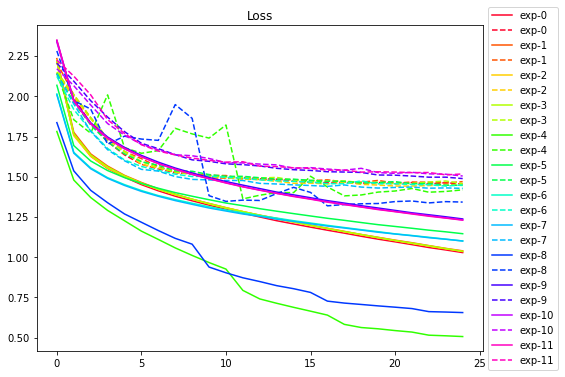

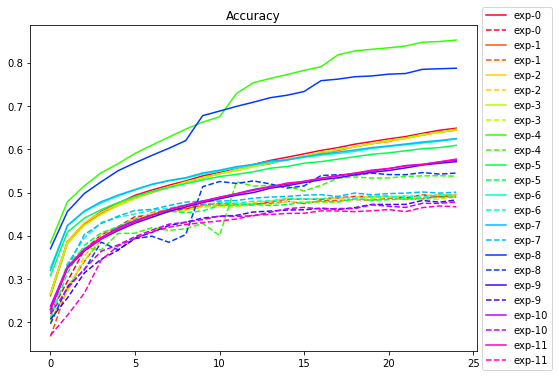

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()